In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Basic packages
from scipy import stats; from scipy.stats import zscore, norm, randint
import matplotlib.style as style; style.use('fivethirtyeight')
#import plotly.express as px
%matplotlib inline

# Impute and Encode
from sklearn.preprocessing import LabelEncoder
#from impute.imputation.cs import mice

# Modelling - LR, KNN, NB, Metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier, VotingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score,roc_curve

# Oversampling
from imblearn.over_sampling import SMOTE

# Suppress warnings
import warnings; warnings.filterwarnings('ignore')

# Visualize Tree
from sklearn.tree import export_graphviz
from IPython.display import Image
from os import system

# Display settings
pd.options.display.max_rows = 10000
pd.options.display.max_columns = 10000

In [2]:
df_train = pd.read_csv("Train_Set_TVS.csv")
df_train.head()

ID  Compensation Vehicle_Status  Loan_amt  Annuity_amt  density_Ind  \
0  540071      801850.0              Y  658040.0     13816.52       0.0304   
1  511643      884222.0              N  198075.0     11173.06       0.0194   
2  506688      284120.0              N  101056.0      8390.40       0.0118   
3  499360      341874.0              N  179008.0      7184.13       0.0373   
4  438350     1259895.0              Y  573715.0     13212.77       0.0138   

  Job_Type Default_hist     Prop_List  Home_Appliances Region_Type Credit_Inq  \
0       IT          ndf  Morethan_One              NaN       Metro          1   
1       IT          ndf  Morethan_One              1.0       Metro          2   
2    Govt.          ndf           One              4.0       Metro          3   
3   Non-IT           df          None              2.0       Metro          1   
4   Non-IT          ndf  Morethan_One              1.0       Rural          2   

  Education_det Marital_Stat Gen Credit_Lnks  Experience     Income_Alt  \
0          Grad      Married   F      1_to_3         0.9  Not_Specified   
1          Grad      Married   M      1_to_3         3.0  Not_Specified   
2         Other      Married   M      1_to_3         NaN  Not_Specified   
3          Grad      Married   M      1_to_3         4.7  Not_Specified   
4          Grad      Married   F      4_to_6         6.9              Y   

  Day_Process Ph.No Type_Loan  Dependents  Company_Rating Region   Age  \
0         SAT   Yes     CLoan         3.0             2.0   East  46.0   
1         wed   Yes     CLoan         3.0             1.0  North  46.0   
2         mon   Yes     CLoan         2.0             3.0  North  57.0   
3         wed   Yes     RLoan         4.0             2.0  South  39.0   
4         Sun   Yes     CLoan         3.0             1.0  North  32.0   

   hour_Process Addr_permanent Permanent_Addr_tag  c1_rated  c2_rated  \
0          10.0            Yes                 No     0.077     0.077   
1          12.0            Yes                Yes     0.184     0.184   
2           5.0            Yes                Yes     0.538     0.538   
3          12.0            Yes                Yes       NaN     0.561   
4          16.0            Yes                Yes       NaN     0.200   

   Contact_age  Product_bought  Default  
0         18.0             2.0      1.0  
1        306.0             4.0      0.0  
2        281.0             4.0      0.0  
3         20.0             4.0      0.0  
4       2339.0             6.0      0.0

In [3]:
df_test = pd.read_csv("Test_Set_TVS.csv")
df_test.head()

ID  Compensation Vehicle_Status   Loan_amt  Annuity_amt  density_Ind  \
0  487410      653106.0              Y  809400.00      9145.51       0.0015   
1  533258      434150.0              N   72618.75      7683.23       0.0332   
2  581926      489060.0              N  267255.80      9032.85       0.0316   
3  486301      957294.0              N  623600.00     12838.25       0.0320   
4  580822     1333739.0              N  529520.00     11799.09       0.0073   

  Job_Type Default_hist     Prop_List  Home_Appliances Region_Type Credit_Inq  \
0    Govt.          ndf  Morethan_One              1.0       Metro          1   
1    Govt.          ndf           One              4.0       Metro          1   
2       IT          ndf  Morethan_One              NaN       Rural          1   
3       IT          ndf           One              4.0       Metro          1   
4   Non-IT          ndf           One              4.0       Metro          3   

  Education_det Marital_Stat Gen Credit_Lnks  Experience     Income_Alt  \
0          Grad      Married   M      1_to_3         5.4  Not_Specified   
1          Grad      Married   M      1_to_3         2.3              Y   
2          Grad      Married   M      1_to_3        11.0              Y   
3          Grad      Married   M      1_to_3         9.7              Y   
4        P_Grad      Married   F      1_to_3         NaN              Y   

  Day_Process Ph.No Type_Loan  Dependents  Company_Rating   Region   Age  \
0        thur   Yes     CLoan         3.0             2.0    North  39.0   
1         wed    No     CLoan         2.0             3.0  Central  46.0   
2        thur    No     CLoan         3.0             2.0    South  33.0   
3         Tue   Yes     CLoan         2.0             2.0     East  48.0   
4         wed   Yes     RLoan         2.0             3.0    North  53.0   

   hour_Process Addr_permanent Permanent_Addr_tag  c1_rated  c2_rated  \
0          11.0            Yes                Yes     0.349     0.349   
1          13.0            Yes                Yes     0.237     0.237   
2          15.0            Yes                Yes     0.111     0.111   
3          12.0            Yes                Yes     0.323     0.323   
4           7.0            Yes                Yes     0.940     0.940   

   Contact_age  Product_bought  
0       3133.0             2.0  
1       1730.0             5.0  
2        759.0             4.0  
3        609.0             4.0  
4       1222.0             1.0

In [4]:
df_train.shape

(132440, 33)

In [5]:
df_test.shape

(56760, 32)

In [6]:
df_train.describe()

ID  Compensation      Loan_amt    Annuity_amt  \
count  132440.000000  1.261980e+05  1.324400e+05  127829.000000   
mean   488938.279319  7.450519e+05  4.148011e+05   10845.286442   
std     58568.207772  4.702762e+05  2.746788e+05    2061.529355   
min    387652.000000  1.527280e+05  3.427500e+04    5852.100000   
25%    438095.500000  5.177060e+05  2.045300e+05    9348.370000   
50%    488952.500000  6.659960e+05  3.495425e+05   10773.820000   
75%    539702.000000  8.794890e+05  5.582050e+05   12165.390000   
max    590407.000000  7.037702e+07  2.872142e+06   41301.000000   

         density_Ind  Home_Appliances     Experience     Dependents  \
count  127024.000000    121476.000000  110595.000000  132440.000000   
mean        0.020446         3.220891       6.580616       2.155467   
std         0.015077         1.241751       6.357054       0.909046   
min         0.000100         1.000000       0.000000       1.000000   
25%         0.010400         2.000000       2.100000       2.000000   
50%         0.020400         4.000000       4.600000       2.000000   
75%         0.030400         4.000000       9.000000       3.000000   
max         2.017800        19.000000      48.100000       9.000000   

       Company_Rating           Age   hour_Process       c1_rated  \
count   120709.000000  132440.00000  132440.000000  114927.000000   
mean         2.030553      43.93326      12.060865       0.505929   
std          0.503750      11.96270       3.566714       0.268665   
min          1.000000      21.00000       0.000000       0.000000   
25%          2.000000      34.00000      10.000000       0.268000   
50%          2.000000      43.00000      12.000000       0.500000   
75%          2.000000      54.00000      15.000000       0.769000   
max          3.000000      69.00000      25.000000       0.947000   

            c2_rated    Contact_age  Product_bought        Default  
count  119119.000000  124287.000000   132440.000000  132440.000000  
mean        0.506181     979.451383        3.387738       0.264301  
std         0.268716     829.632194        2.173246       0.440962  
min         0.000000      10.000000        0.000000       0.000000  
25%         0.268000     288.000000        2.000000       0.000000  
50%         0.500000     770.000000        3.000000       0.000000  
75%         0.769000    1589.000000        5.000000       1.000000  
max         0.947000    4309.000000       25.000000       1.000000

In [7]:
df_test.describe()

ID  Compensation      Loan_amt   Annuity_amt   density_Ind  \
count   56760.000000  5.401000e+04  5.676000e+04  54797.000000  54485.000000   
mean   489156.967089  7.423110e+05  4.145631e+05  10832.334840      0.020465   
std     58459.598434  3.764809e+05  2.759849e+05   2060.269444      0.016790   
min    387653.000000  1.483300e+05  3.477750e+04   6061.610000      0.000000   
25%    438878.000000  5.162055e+05  2.035587e+05   9344.360000      0.010400   
50%    488939.500000  6.667440e+05  3.488628e+05  10756.450000      0.020300   
75%    539700.500000  8.770300e+05  5.598608e+05  12142.340000      0.030500   
max    590401.000000  1.727617e+07  2.743640e+06  38116.000000      2.037200   

       Home_Appliances    Experience    Dependents  Company_Rating  \
count     52001.000000  47409.000000  56760.000000    51707.000000   
mean          3.220688      6.590278      2.150828        2.028487   
std           1.240932      6.284459      0.909028        0.505052   
min           1.000000      0.000000      1.000000        1.000000   
25%           2.000000      2.200000      2.000000        2.000000   
50%           4.000000      4.600000      2.000000        2.000000   
75%           4.000000      9.000000      3.000000        2.000000   
max          19.000000     48.100000      9.000000        3.000000   

                Age  hour_Process      c1_rated      c2_rated  Contact_age  \
count  56760.000000  56760.000000  49397.000000  51105.000000  53238.00000   
mean      43.944327     12.079299      0.505408      0.506154    971.82118   
std       11.979557      3.554178      0.268413      0.268316    825.51022   
min       21.000000      0.000000      0.000000      0.000000     10.00000   
25%       34.000000     10.000000      0.268000      0.269000    284.00000   
50%       43.000000     12.000000      0.431000      0.500000    767.00000   
75%       54.000000     15.000000      0.769000      0.769000   1579.00000   
max       69.000000     25.000000      0.941000      0.941000   4109.00000   

       Product_bought  
count    56760.000000  
mean         3.399683  
std          2.174527  
min          0.000000  
25%          2.000000  
50%          3.000000  
75%          5.000000  
max         26.000000

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132440 entries, 0 to 132439
Data columns (total 33 columns):
ID                    132440 non-null int64
Compensation          126198 non-null float64
Vehicle_Status        123336 non-null object
Loan_amt              132440 non-null float64
Annuity_amt           127829 non-null float64
density_Ind           127024 non-null float64
Job_Type              122192 non-null object
Default_hist          132440 non-null object
Prop_List             130475 non-null object
Home_Appliances       121476 non-null float64
Region_Type           132440 non-null object
Credit_Inq            129750 non-null object
Education_det         132440 non-null object
Marital_Stat          132440 non-null object
Gen                   132440 non-null object
Credit_Lnks           132440 non-null object
Experience            110595 non-null float64
Income_Alt            124758 non-null object
Day_Process           132440 non-null object
Ph.No                 132440 

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56760 entries, 0 to 56759
Data columns (total 32 columns):
ID                    56760 non-null int64
Compensation          54010 non-null float64
Vehicle_Status        52877 non-null object
Loan_amt              56760 non-null float64
Annuity_amt           54797 non-null float64
density_Ind           54485 non-null float64
Job_Type              52440 non-null object
Default_hist          56760 non-null object
Prop_List             55849 non-null object
Home_Appliances       52001 non-null float64
Region_Type           56760 non-null object
Credit_Inq            55594 non-null object
Education_det         56760 non-null object
Marital_Stat          56760 non-null object
Gen                   56760 non-null object
Credit_Lnks           56760 non-null object
Experience            47409 non-null float64
Income_Alt            53461 non-null object
Day_Process           56760 non-null object
Ph.No                 56760 non-null object
Type_L

In [10]:
df_train.isnull().sum()

ID                        0
Compensation           6242
Vehicle_Status         9104
Loan_amt                  0
Annuity_amt            4611
density_Ind            5416
Job_Type              10248
Default_hist              0
Prop_List              1965
Home_Appliances       10964
Region_Type               0
Credit_Inq             2690
Education_det             0
Marital_Stat              0
Gen                       0
Credit_Lnks               0
Experience            21845
Income_Alt             7682
Day_Process               0
Ph.No                     0
Type_Loan                 0
Dependents                0
Company_Rating        11731
Region                    0
Age                       0
hour_Process              0
Addr_permanent            0
Permanent_Addr_tag        0
c1_rated              17513
c2_rated              13321
Contact_age            8153
Product_bought            0
Default                   0
dtype: int64

In [11]:
df_test.isnull().sum()

ID                       0
Compensation          2750
Vehicle_Status        3883
Loan_amt                 0
Annuity_amt           1963
density_Ind           2275
Job_Type              4320
Default_hist             0
Prop_List              911
Home_Appliances       4759
Region_Type              0
Credit_Inq            1166
Education_det            0
Marital_Stat             0
Gen                      0
Credit_Lnks              0
Experience            9351
Income_Alt            3299
Day_Process              0
Ph.No                    0
Type_Loan                0
Dependents               0
Company_Rating        5053
Region                   0
Age                      0
hour_Process             0
Addr_permanent           0
Permanent_Addr_tag       0
c1_rated              7363
c2_rated              5655
Contact_age           3522
Product_bought           0
dtype: int64

In [12]:
(df_train.isnull().sum()/len(df_train))*100

ID                     0.000000
Compensation           4.713078
Vehicle_Status         6.874056
Loan_amt               0.000000
Annuity_amt            3.481577
density_Ind            4.089399
Job_Type               7.737844
Default_hist           0.000000
Prop_List              1.483691
Home_Appliances        8.278466
Region_Type            0.000000
Credit_Inq             2.031108
Education_det          0.000000
Marital_Stat           0.000000
Gen                    0.000000
Credit_Lnks            0.000000
Experience            16.494262
Income_Alt             5.800362
Day_Process            0.000000
Ph.No                  0.000000
Type_Loan              0.000000
Dependents             0.000000
Company_Rating         8.857596
Region                 0.000000
Age                    0.000000
hour_Process           0.000000
Addr_permanent         0.000000
Permanent_Addr_tag     0.000000
c1_rated              13.223346
c2_rated              10.058140
Contact_age            6.155995
Product_

In [13]:
(df_test.isnull().sum()/len(df_test))*100

ID                     0.000000
Compensation           4.844961
Vehicle_Status         6.841085
Loan_amt               0.000000
Annuity_amt            3.458421
density_Ind            4.008104
Job_Type               7.610994
Default_hist           0.000000
Prop_List              1.605004
Home_Appliances        8.384426
Region_Type            0.000000
Credit_Inq             2.054264
Education_det          0.000000
Marital_Stat           0.000000
Gen                    0.000000
Credit_Lnks            0.000000
Experience            16.474630
Income_Alt             5.812192
Day_Process            0.000000
Ph.No                  0.000000
Type_Loan              0.000000
Dependents             0.000000
Company_Rating         8.902396
Region                 0.000000
Age                    0.000000
hour_Process           0.000000
Addr_permanent         0.000000
Permanent_Addr_tag     0.000000
c1_rated              12.972163
c2_rated               9.963002
Contact_age            6.205074
Product_

In [14]:
for column in df_train.columns:
    if df_train[column].dtype == 'object':
        print("Unique values in ",column.upper(),'is : ',df_train[column].nunique())
        print(df_train[column].value_counts().sort_values())
        print('\n')

Unique values in  VEHICLE_STATUS is :  2
Y    41966
N    81370
Name: Vehicle_Status, dtype: int64


Unique values in  JOB_TYPE is :  3
Govt.     25722
Non-IT    29488
IT        66982
Name: Job_Type, dtype: int64


Unique values in  DEFAULT_HIST is :  2
df      13270
ndf    119170
Name: Default_hist, dtype: int64


Unique values in  PROP_LIST is :  3
None            13020
Morethan_One    25896
One             91559
Name: Prop_List, dtype: int64


Unique values in  REGION_TYPE is :  3
other      2614
Rural     22278
Metro    107548
Name: Region_Type, dtype: int64


Unique values in  CREDIT_INQ is :  4
>4     9138
3     23178
2     30362
1     67072
Name: Credit_Inq, dtype: int64


Unique values in  EDUCATION_DET is :  3
Other      6125
P_Grad    32457
Grad      93858
Name: Education_det, dtype: int64


Unique values in  MARITAL_STAT is :  4
Widow       6776
Divorce     8391
Single     19664
Married    97609
Name: Marital_Stat, dtype: int64


Unique values in  GEN is :  2
F    45377
M    

In [15]:
df_train.columns = df_train.columns.str.replace('.', '_')
df_train.columns

Index(['ID', 'Compensation', 'Vehicle_Status', 'Loan_amt', 'Annuity_amt',
       'density_Ind', 'Job_Type', 'Default_hist', 'Prop_List',
       'Home_Appliances', 'Region_Type', 'Credit_Inq', 'Education_det',
       'Marital_Stat', 'Gen', 'Credit_Lnks', 'Experience', 'Income_Alt',
       'Day_Process', 'Ph_No', 'Type_Loan', 'Dependents', 'Company_Rating',
       'Region', 'Age', 'hour_Process', 'Addr_permanent', 'Permanent_Addr_tag',
       'c1_rated', 'c2_rated', 'Contact_age', 'Product_bought', 'Default'],
      dtype='object')

In [16]:
for column in df_test.columns:
    if df_test[column].dtype == 'object':
        print("Unique values in ",column.upper(),'is : ',df_test[column].nunique())
        print(df_test[column].value_counts().sort_values())
        print('\n')

Unique values in  VEHICLE_STATUS is :  2
Y    18156
N    34721
Name: Vehicle_Status, dtype: int64


Unique values in  JOB_TYPE is :  3
Govt.     11008
Non-IT    12640
IT        28792
Name: Job_Type, dtype: int64


Unique values in  DEFAULT_HIST is :  2
df      5690
ndf    51070
Name: Default_hist, dtype: int64


Unique values in  PROP_LIST is :  3
None             5581
Morethan_One    11046
One             39222
Name: Prop_List, dtype: int64


Unique values in  REGION_TYPE is :  3
other     1186
Rural     9526
Metro    46048
Name: Region_Type, dtype: int64


Unique values in  CREDIT_INQ is :  4
>4     3863
3      9998
2     13030
1     28703
Name: Credit_Inq, dtype: int64


Unique values in  EDUCATION_DET is :  3
Other      2663
P_Grad    13689
Grad      40408
Name: Education_det, dtype: int64


Unique values in  MARITAL_STAT is :  4
Widow       2973
Divorce     3727
Single      8335
Married    41725
Name: Marital_Stat, dtype: int64


Unique values in  GEN is :  2
F    19501
M    37259

In [17]:
df_test.columns = df_test.columns.str.replace('.', '_')
df_test.columns

Index(['ID', 'Compensation', 'Vehicle_Status', 'Loan_amt', 'Annuity_amt',
       'density_Ind', 'Job_Type', 'Default_hist', 'Prop_List',
       'Home_Appliances', 'Region_Type', 'Credit_Inq', 'Education_det',
       'Marital_Stat', 'Gen', 'Credit_Lnks', 'Experience', 'Income_Alt',
       'Day_Process', 'Ph_No', 'Type_Loan', 'Dependents', 'Company_Rating',
       'Region', 'Age', 'hour_Process', 'Addr_permanent', 'Permanent_Addr_tag',
       'c1_rated', 'c2_rated', 'Contact_age', 'Product_bought'],
      dtype='object')

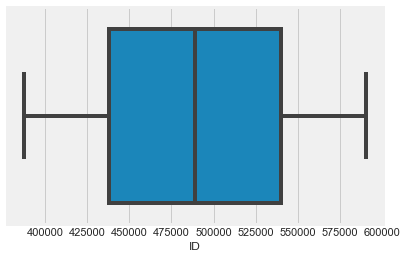

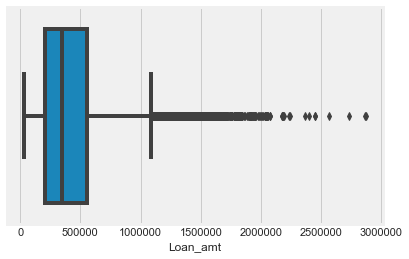

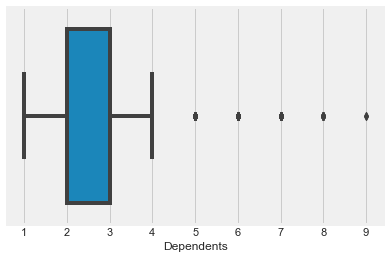

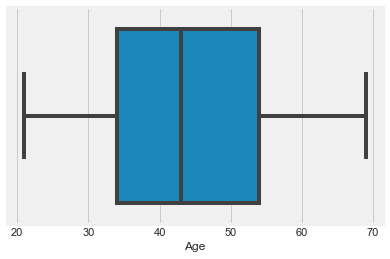

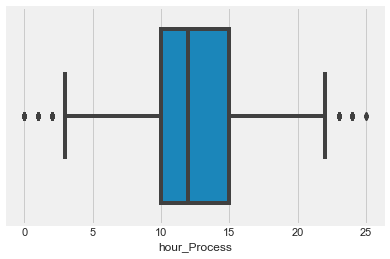

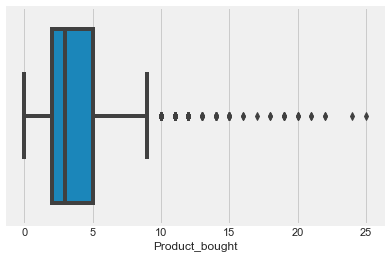

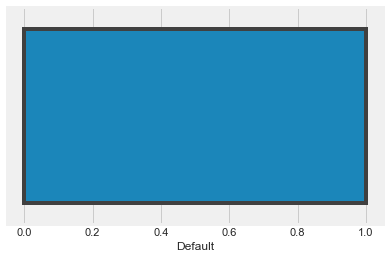

In [18]:
splot_cols=df_train.columns
for i in splot_cols:
    if df_train[i].dtype != 'object' and df_train[i].isnull().values.any() != True:
        sns.boxplot(df_train[i])
        plt.show()

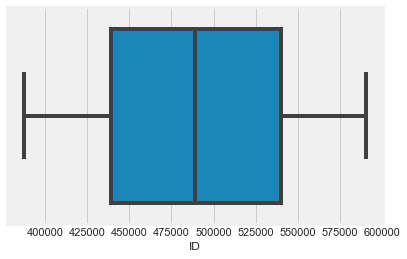

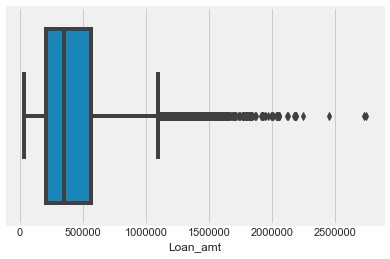

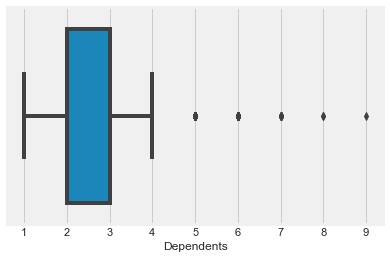

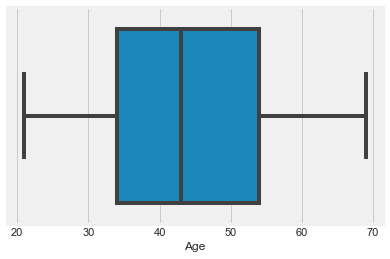

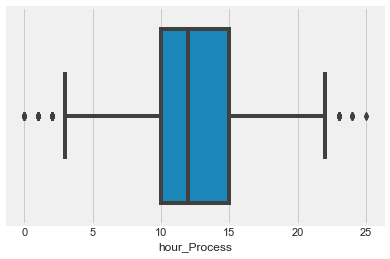

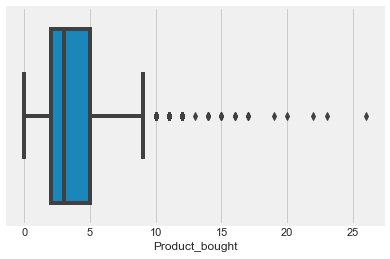

In [24]:
splot_cols=df_test.columns
for i in splot_cols:
    if df_test[i].dtype != 'object' and df_test[i].isnull().values.any() != True:
        sns.boxplot(df_test[i])
        plt.show()

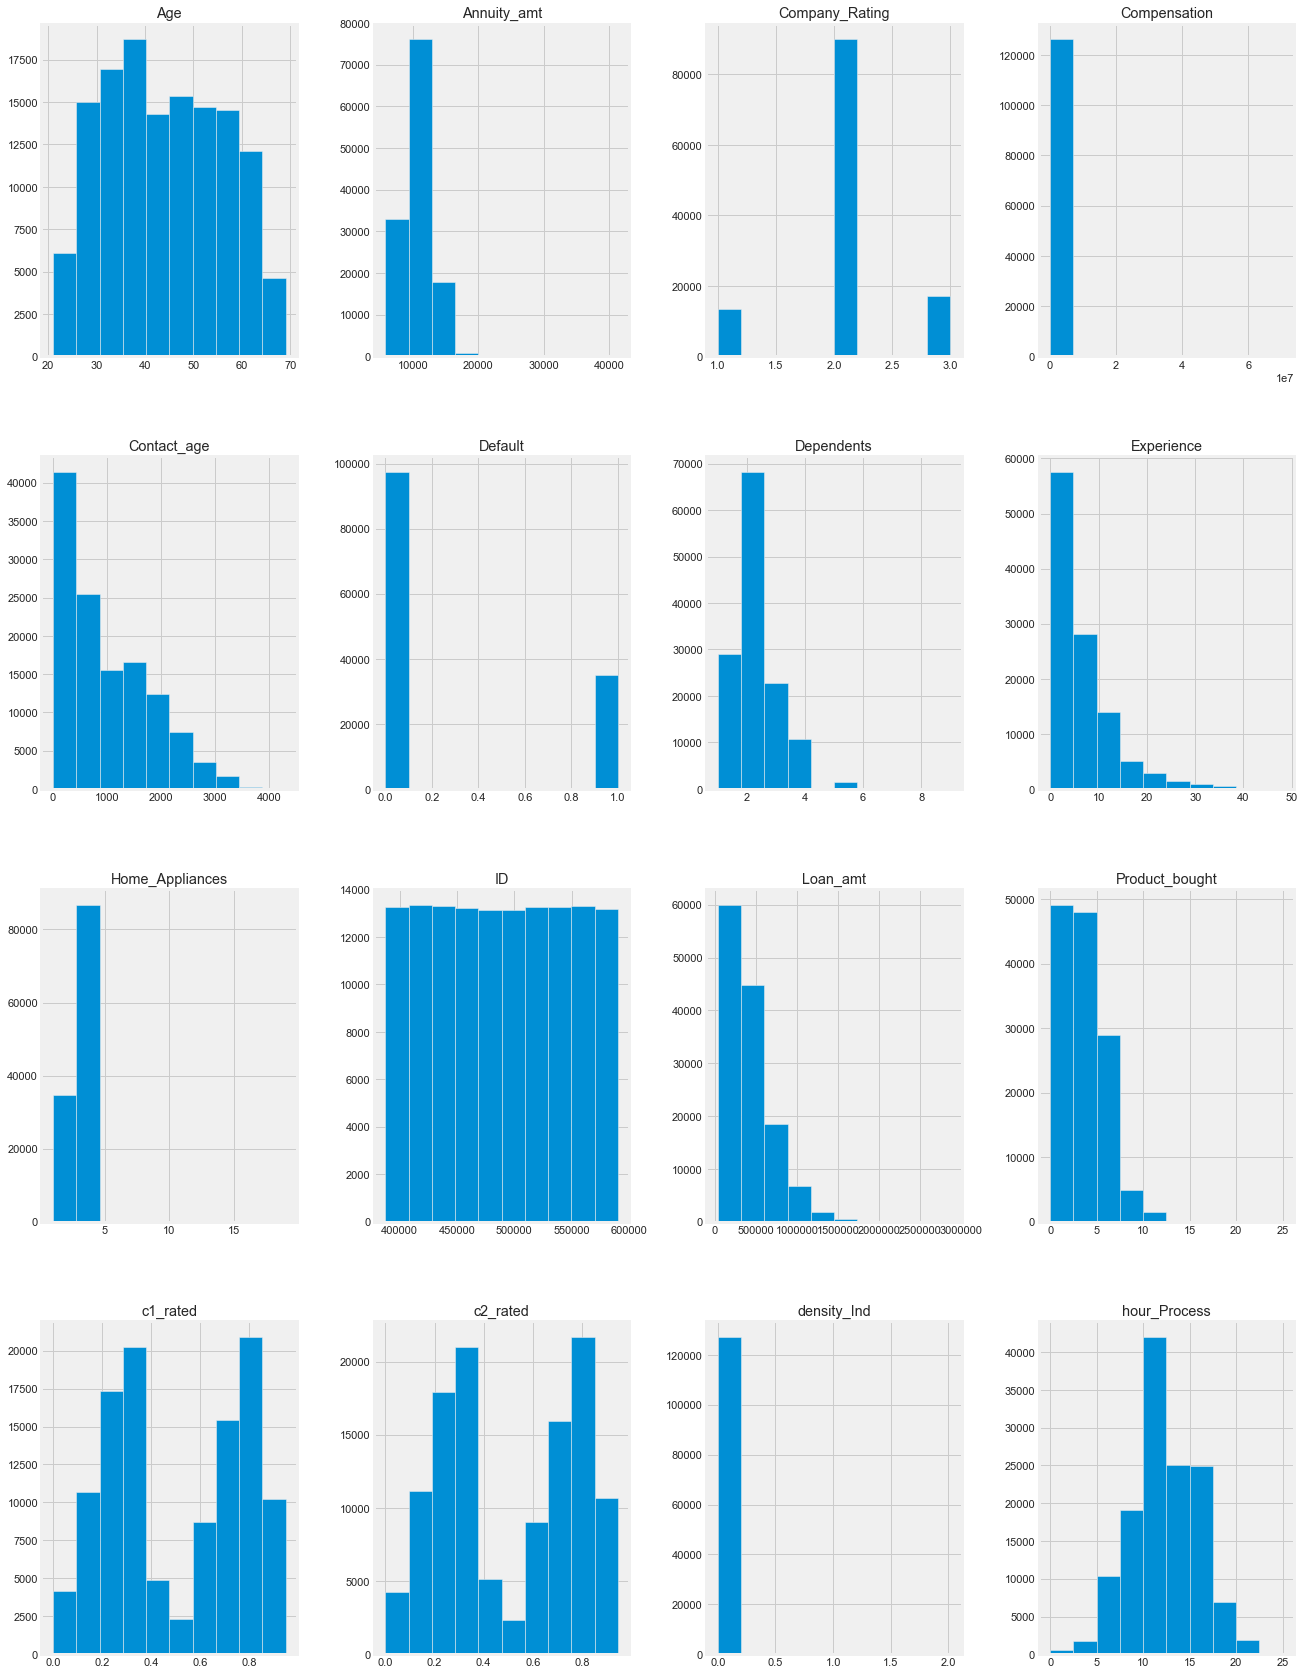

In [19]:
df_train.hist(figsize=(20,30));

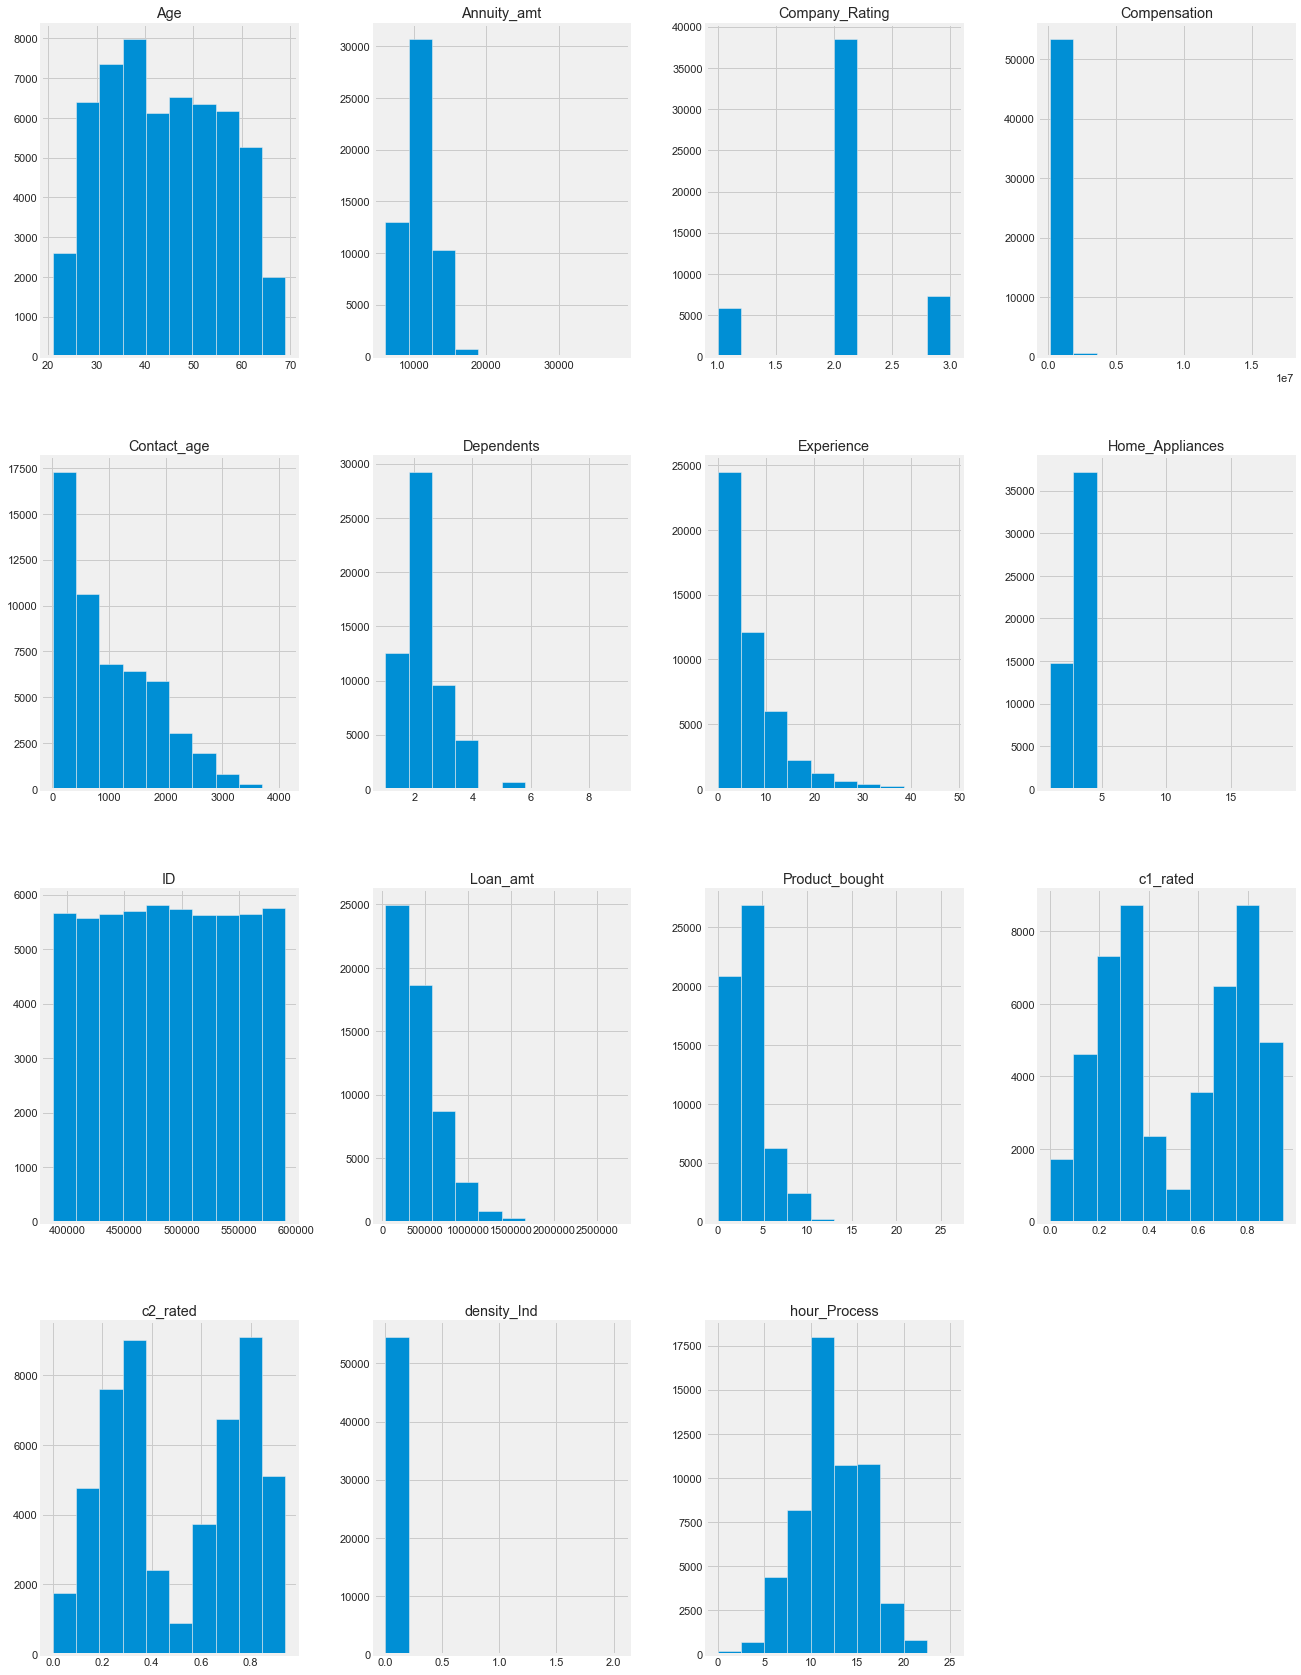

In [25]:
df_test.hist(figsize=(20,30));

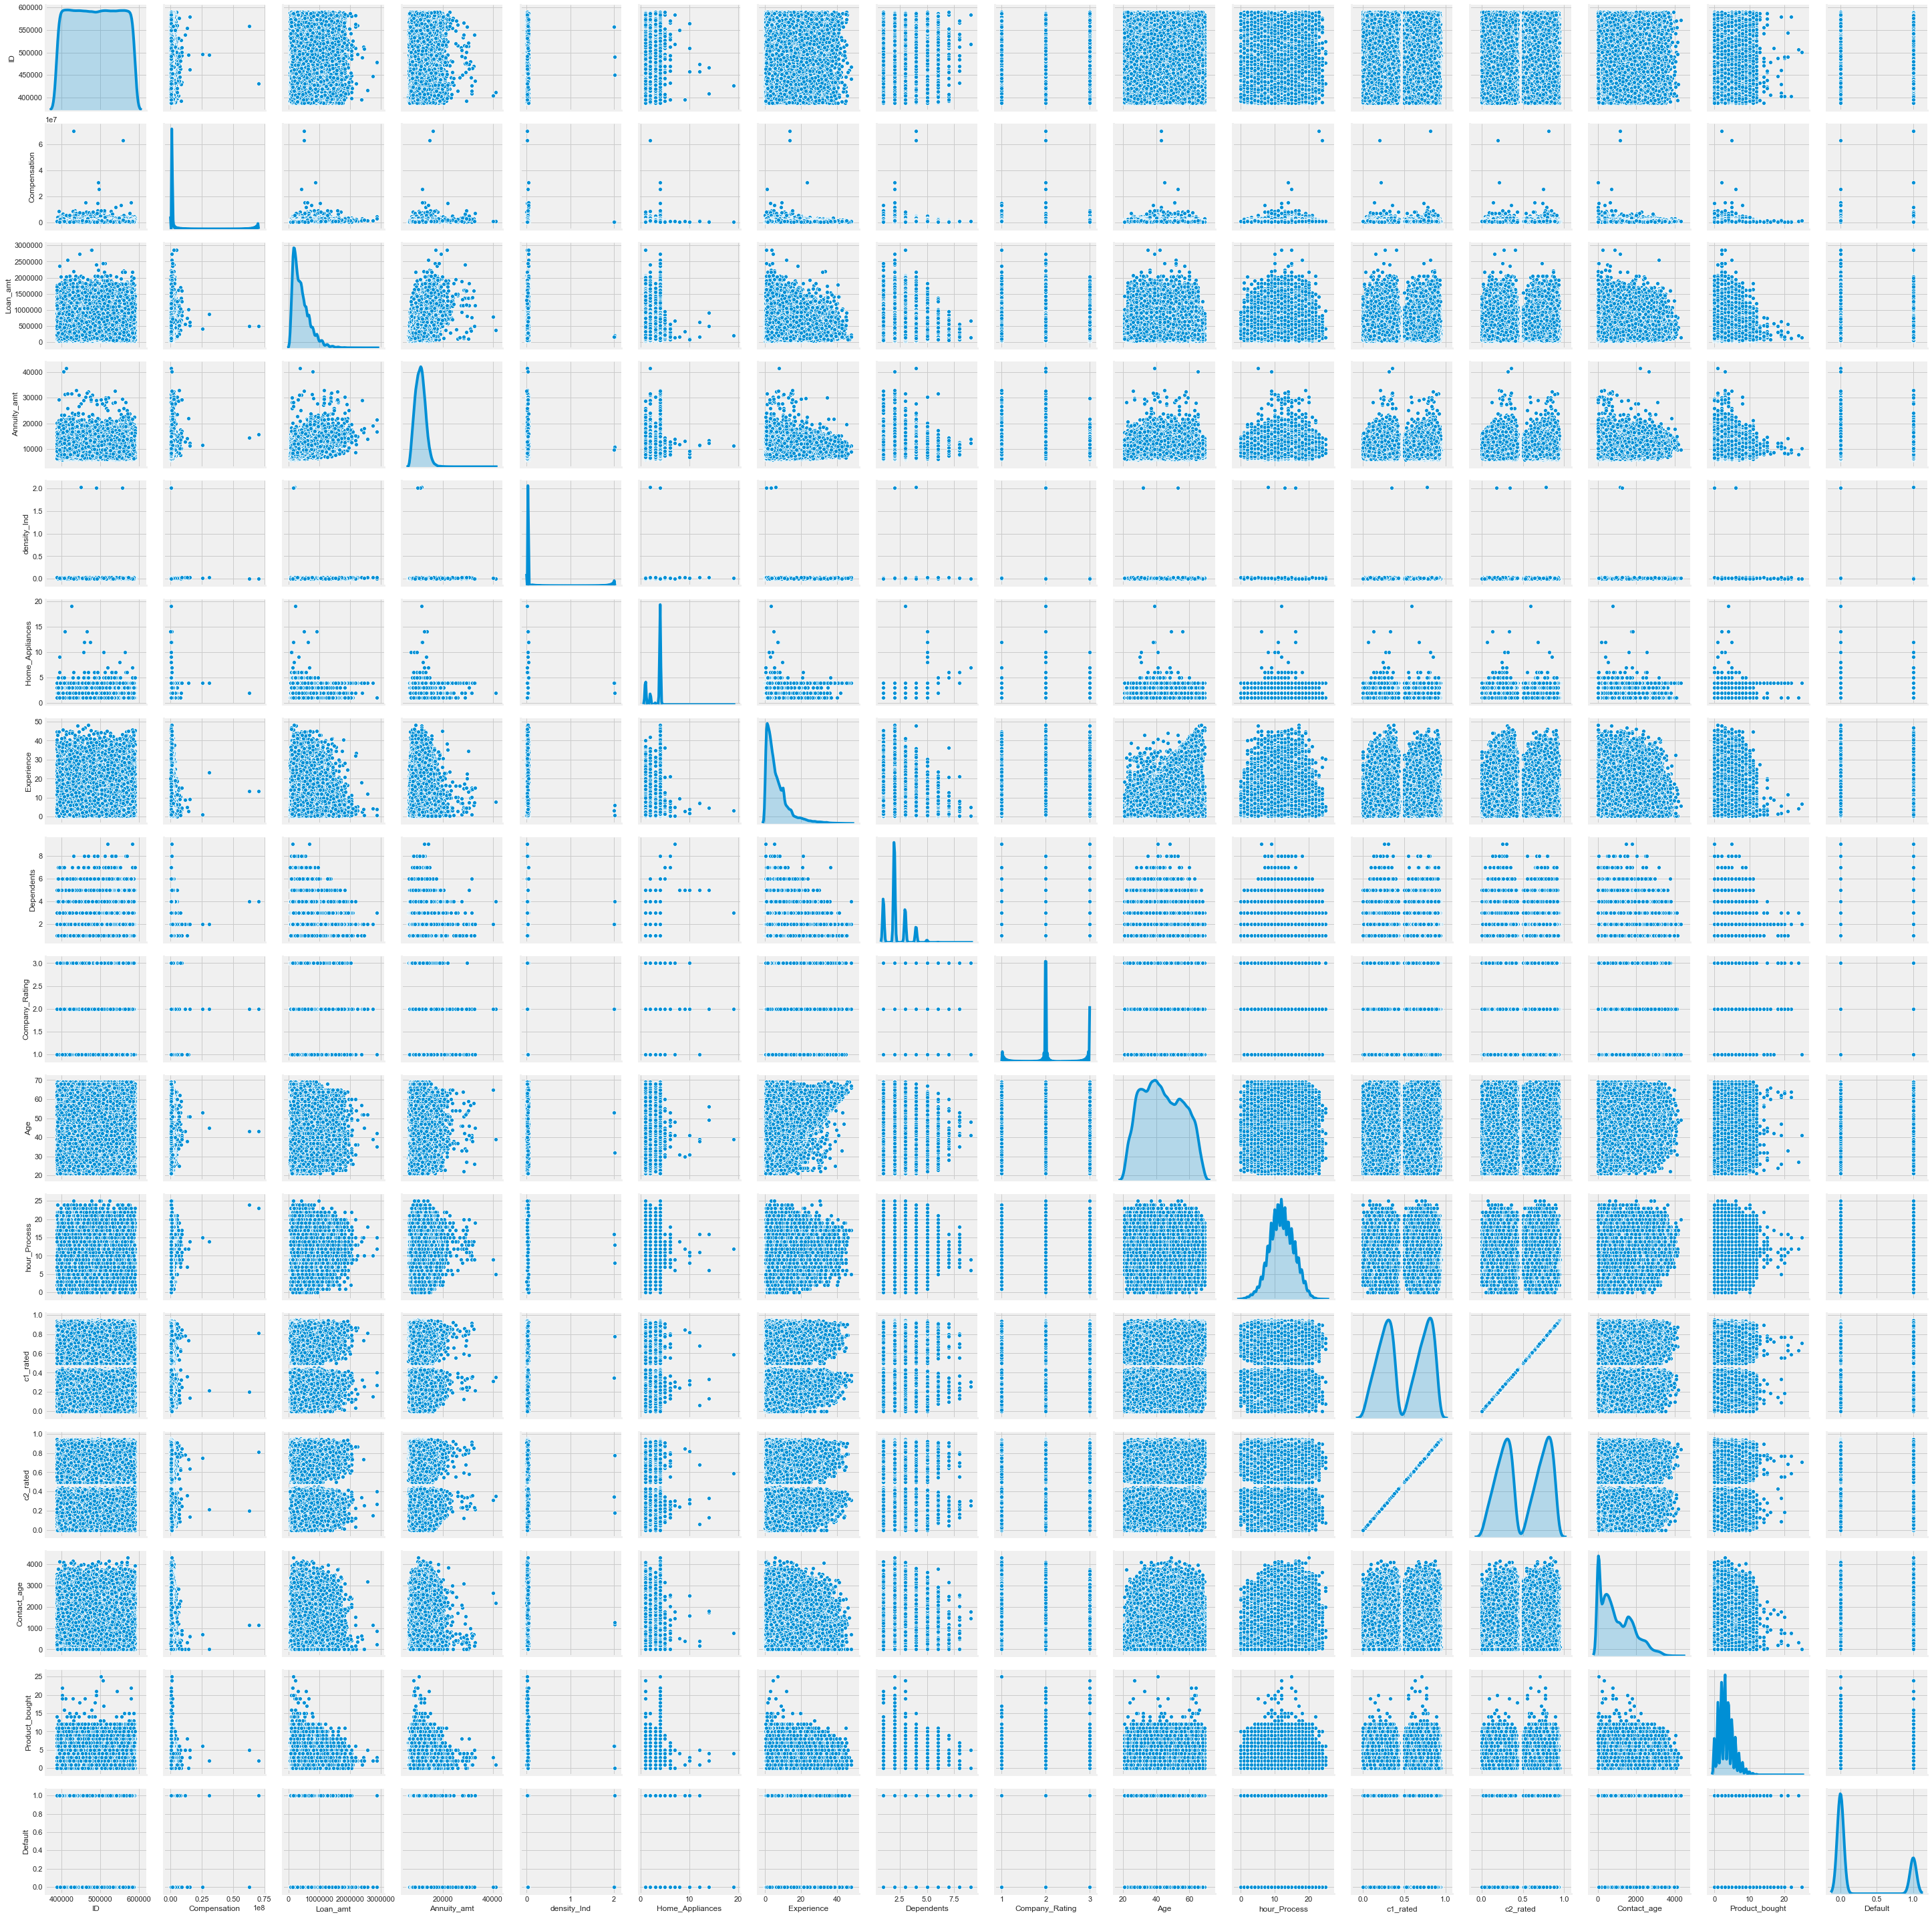

In [20]:
sns.pairplot(df_train,diag_kind='kde',palette="tab10")

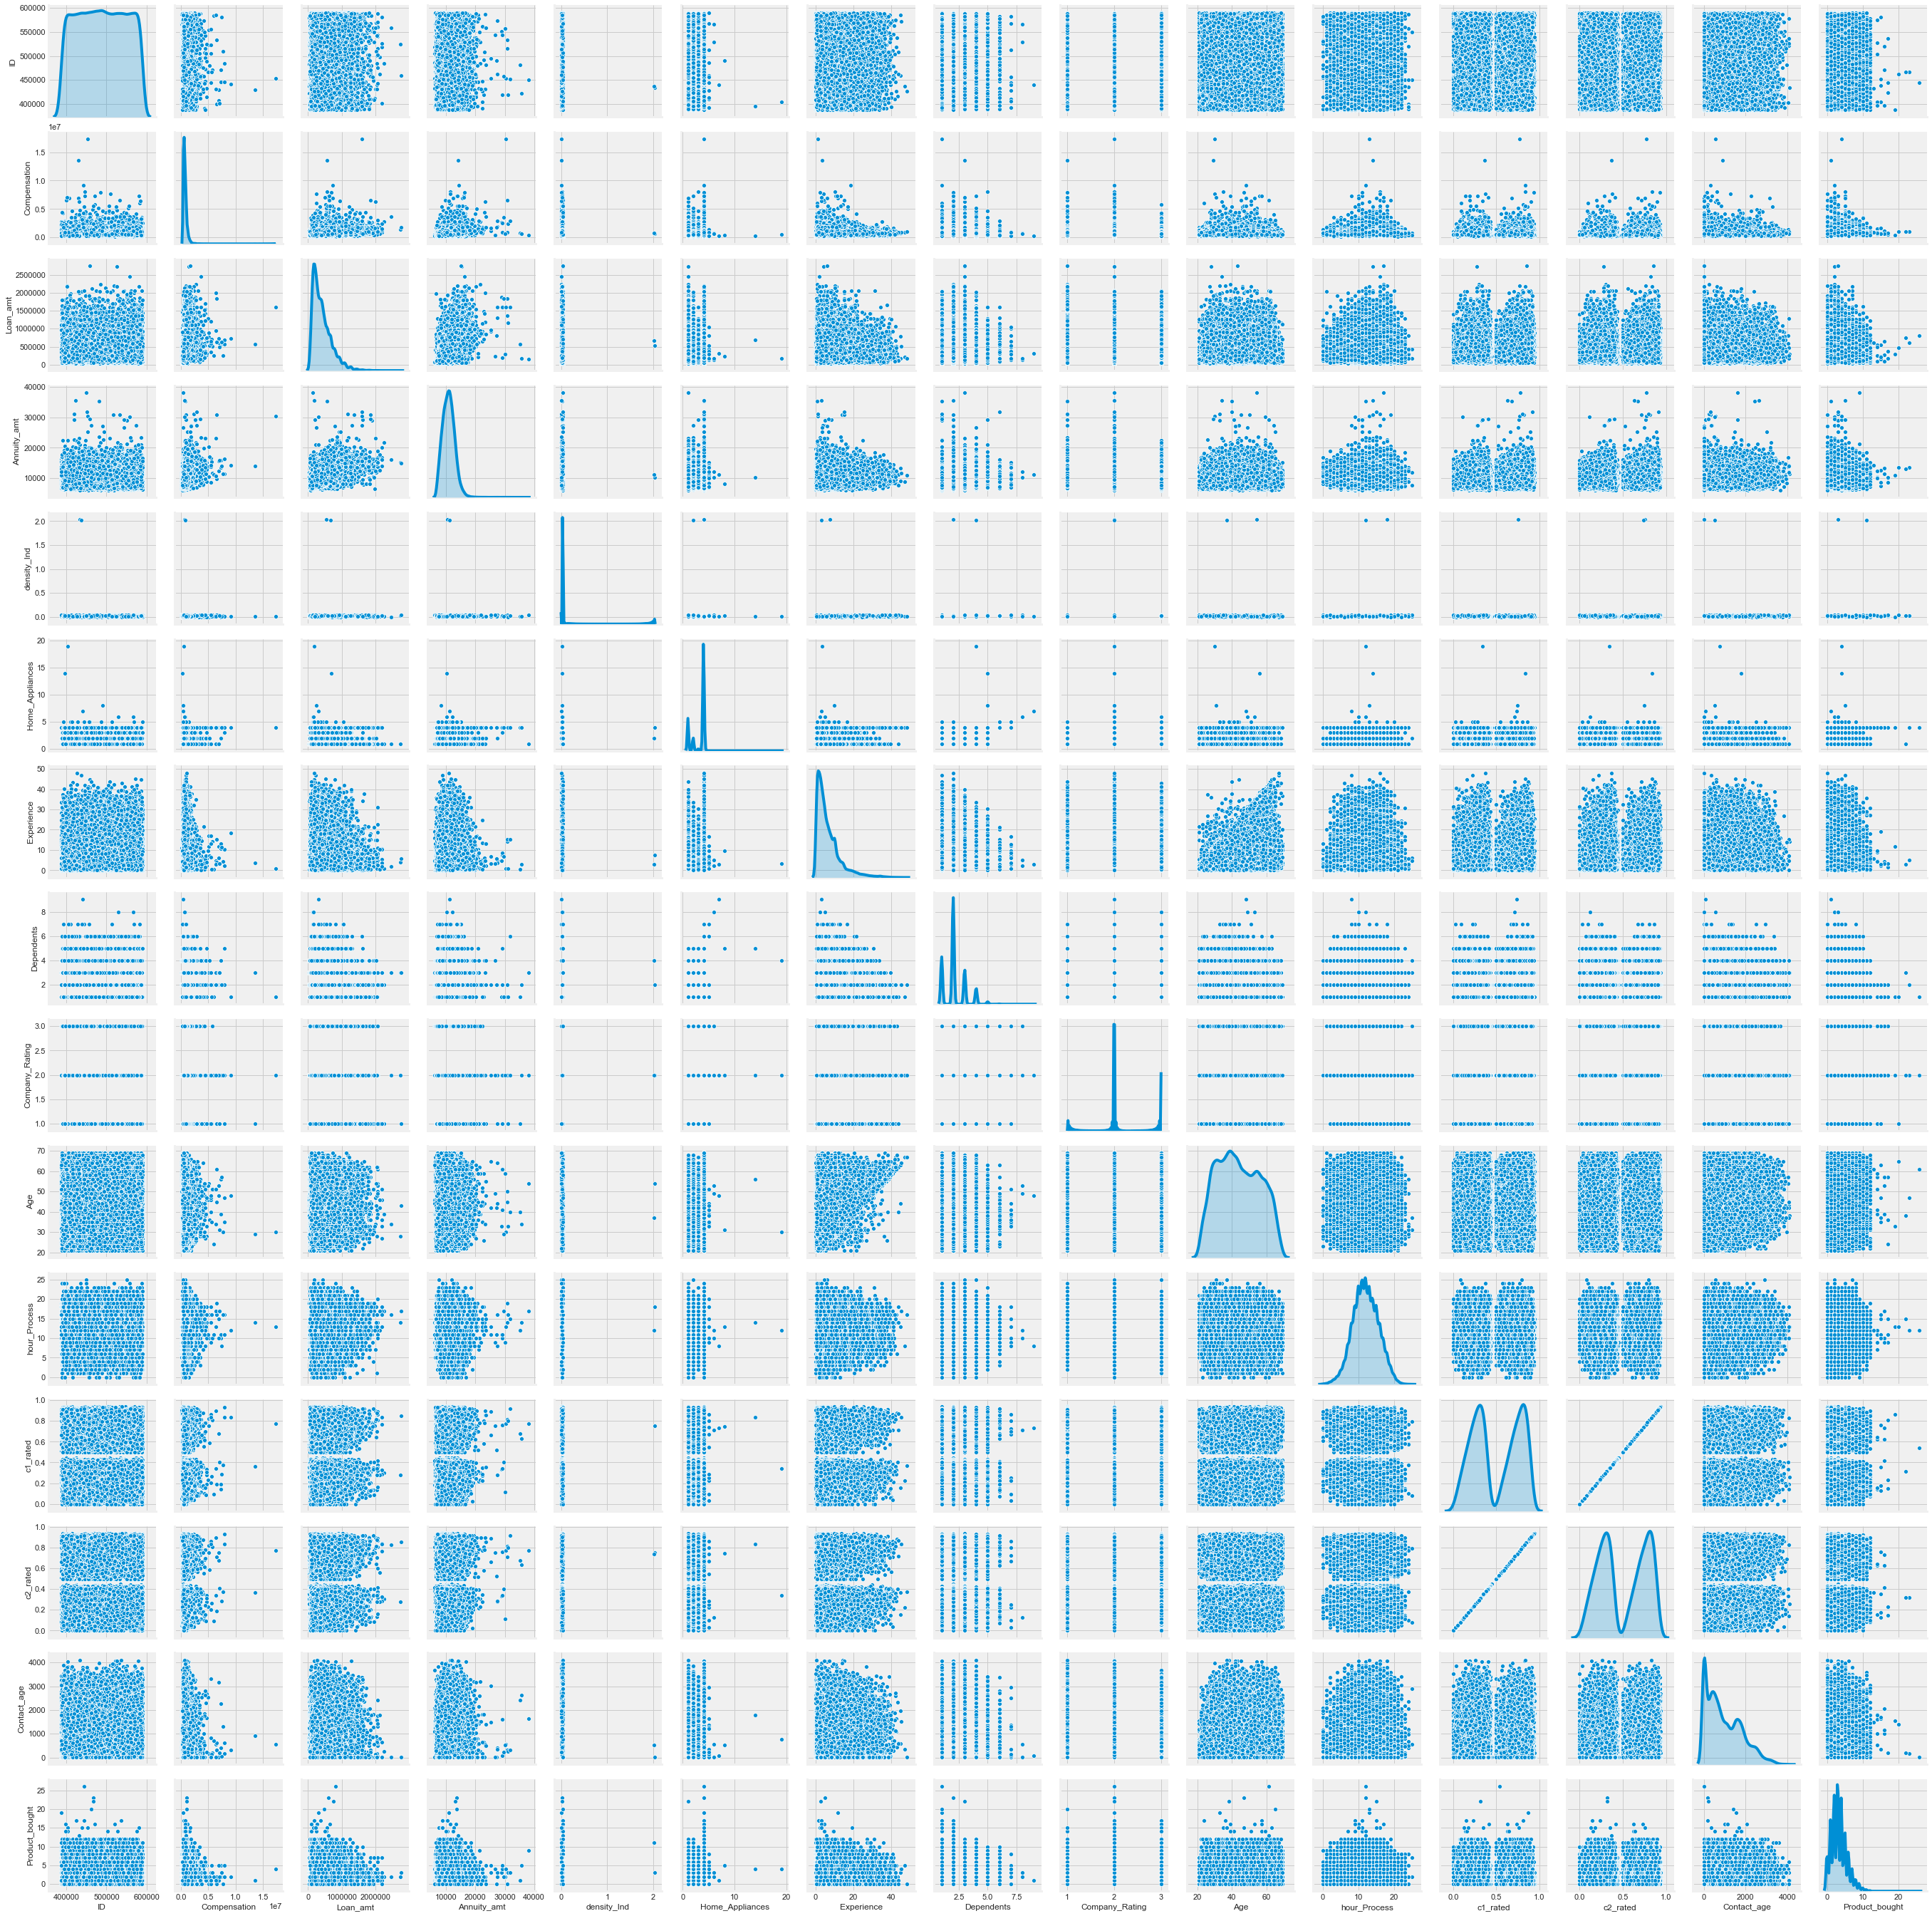

In [26]:
sns.pairplot(df_test,diag_kind='kde',palette="tab10")

In [21]:
df_train.corr()

ID  Compensation  Loan_amt  Annuity_amt  density_Ind  \
ID               1.000000      0.000663  0.001005     0.001591     0.001294   
Compensation     0.000663      1.000000  0.266282     0.240677     0.000676   
Loan_amt         0.001005      0.266282  1.000000     0.487726     0.000780   
Annuity_amt      0.001591      0.240677  0.487726     1.000000     0.002008   
density_Ind      0.001294      0.000676  0.000780     0.002008     1.000000   
Home_Appliances  0.002065     -0.027005  0.002664    -0.012353     0.001068   
Experience      -0.006953      0.026336  0.076666     0.035001    -0.002896   
Dependents       0.000616      0.028301  0.054520     0.051107    -0.000848   
Company_Rating   0.001091     -0.163948 -0.101911    -0.096917    -0.009716   
Age             -0.000608     -0.042217  0.049473    -0.006268    -0.001770   
hour_Process     0.000909      0.064352  0.042255     0.030093     0.003082   
c1_rated         0.003904     -0.015832  0.006083     0.003830    -0.001601   
c2_rated         0.003714     -0.014824  0.005706     0.001989    -0.003426   
Contact_age     -0.003894      0.033560  0.063308     0.040426    -0.003137   
Product_bought   0.001894      0.018357 -0.029405    -0.008943     0.000278   
Default          0.000072     -0.001455 -0.008946    -0.004134     0.000991   

                 Home_Appliances  Experience  Dependents  Company_Rating  \
ID                      0.002065   -0.006953    0.000616        0.001091   
Compensation           -0.027005    0.026336    0.028301       -0.163948   
Loan_amt                0.002664    0.076666    0.054520       -0.101911   
Annuity_amt            -0.012353    0.035001    0.051107       -0.096917   
density_Ind             0.001068   -0.002896   -0.000848       -0.009716   
Home_Appliances         1.000000    0.072510   -0.618543       -0.010596   
Experience              0.072510    1.000000   -0.035172        0.006026   
Dependents             -0.618543   -0.035172    1.000000        0.030451   
Company_Rating         -0.010596    0.006026    0.030451        1.000000   
Age                     0.330201    0.329404   -0.264799       -0.006189   
hour_Process            0.001249   -0.012679   -0.011311       -0.232106   
c1_rated                0.007362    0.040402   -0.004097        0.000479   
c2_rated                0.008609    0.041519   -0.003398        0.001683   
Contact_age            -0.007108    0.132993    0.027048       -0.024565   
Product_bought          0.030492   -0.001461   -0.017262        0.006244   
Default                -0.003848   -0.022894    0.002355        0.015499   

                      Age  hour_Process  c1_rated  c2_rated  Contact_age  \
ID              -0.000608      0.000909  0.003904  0.003714    -0.003894   
Compensation    -0.042217      0.064352 -0.015832 -0.014824     0.033560   
Loan_amt         0.049473      0.042255  0.006083  0.005706     0.063308   
Annuity_amt     -0.006268      0.030093  0.003830  0.001989     0.040426   
density_Ind     -0.001770      0.003082 -0.001601 -0.003426    -0.003137   
Home_Appliances  0.330201      0.001249  0.007362  0.008609    -0.007108   
Experience       0.329404     -0.012679  0.040402  0.041519     0.132993   
Dependents      -0.264799     -0.011311 -0.004097 -0.003398     0.027048   
Company_Rating  -0.006189     -0.232106  0.000479  0.001683    -0.024565   
Age              1.000000     -0.076291  0.061336  0.061904     0.077793   
hour_Process    -0.076291      1.000000 -0.012199 -0.011544     0.013144   
c1_rated         0.061336     -0.012199  1.000000  1.000000     0.022208   
c2_rated         0.061904     -0.011544  1.000000  1.000000     0.021460   
Contact_age      0.077793      0.013144  0.022208  0.021460     1.000000   
Product_bought   0.052711     -0.019775 -0.022674 -0.022996     0.078508   
Default         -0.023211     -0.007573 -0.014637 -0.014249    -0.014431   

                 Product_bought   Default  
ID                     0.001894  0.000072  
Compe

In [27]:
df_test.corr()

ID  Compensation  Loan_amt  Annuity_amt  density_Ind  \
ID               1.000000     -0.003569 -0.002687     0.003217    -0.004054   
Compensation    -0.003569      1.000000  0.326755     0.294794     0.002889   
Loan_amt        -0.002687      0.326755  1.000000     0.475121     0.002147   
Annuity_amt      0.003217      0.294794  0.475121     1.000000    -0.001020   
density_Ind     -0.004054      0.002889  0.002147    -0.001020     1.000000   
Home_Appliances  0.004358     -0.030340  0.003122    -0.014860    -0.000055   
Experience       0.003605      0.029597  0.072579     0.031105    -0.000303   
Dependents      -0.004247      0.029042  0.050128     0.047485     0.003828   
Company_Rating   0.007188     -0.209238 -0.100620    -0.090894    -0.011318   
Age              0.002184     -0.055023  0.042926    -0.011180    -0.003511   
hour_Process    -0.013538      0.071969  0.047001     0.033913     0.010755   
c1_rated         0.009398     -0.016095  0.004525     0.000883    -0.000070   
c2_rated         0.008507     -0.018081  0.003973    -0.002292     0.004263   
Contact_age      0.003870      0.035405  0.059379     0.044301    -0.001684   
Product_bought  -0.004107      0.021911 -0.036242    -0.003887     0.013855   

                 Home_Appliances  Experience  Dependents  Company_Rating  \
ID                      0.004358    0.003605   -0.004247        0.007188   
Compensation           -0.030340    0.029597    0.029042       -0.209238   
Loan_amt                0.003122    0.072579    0.050128       -0.100620   
Annuity_amt            -0.014860    0.031105    0.047485       -0.090894   
density_Ind            -0.000055   -0.000303    0.003828       -0.011318   
Home_Appliances         1.000000    0.072378   -0.620284       -0.005180   
Experience              0.072378    1.000000   -0.032660        0.010881   
Dependents             -0.620284   -0.032660    1.000000        0.032991   
Company_Rating         -0.005180    0.010881    0.032991        1.000000   
Age                     0.327386    0.330213   -0.267369       -0.008368   
hour_Process            0.000694   -0.015223   -0.009242       -0.235975   
c1_rated                0.015578    0.034229   -0.007659       -0.008141   
c2_rated                0.015920    0.034297   -0.009590       -0.006611   
Contact_age            -0.010797    0.125883    0.028401       -0.017996   
Product_bought          0.031189    0.003489   -0.017921        0.012092   

                      Age  hour_Process  c1_rated  c2_rated  Contact_age  \
ID               0.002184     -0.013538  0.009398  0.008507     0.003870   
Compensation    -0.055023      0.071969 -0.016095 -0.018081     0.035405   
Loan_amt         0.042926      0.047001  0.004525  0.003973     0.059379   
Annuity_amt     -0.011180      0.033913  0.000883 -0.002292     0.044301   
density_Ind     -0.003511      0.010755 -0.000070  0.004263    -0.001684   
Home_Appliances  0.327386      0.000694  0.015578  0.015920    -0.010797   
Experience       0.330213     -0.015223  0.034229  0.034297     0.125883   
Dependents      -0.267369     -0.009242 -0.007659 -0.009590     0.028401   
Company_Rating  -0.008368     -0.235975 -0.008141 -0.006611    -0.017996   
Age              1.000000     -0.081447  0.057631  0.058189     0.071338   
hour_Process    -0.081447      1.000000 -0.010034 -0.008786     0.004739   
c1_rated         0.057631     -0.010034  1.000000  1.000000     0.016057   
c2_rated         0.058189     -0.008786  1.000000  1.000000     0.015072   
Contact_age      0.071338      0.004739  0.016057  0.015072     1.000000   
Product_bought   0.045922     -0.018766 -0.027110 -0.026379     0.085147   

                 Product_bought  
ID                    -0.004107  
Compensation           0.021911  
Loan_amt              -0.036242  
Annuity_amt           -0.003887  
density_Ind            0.013855  
Home_Appliances        0.031189  
Experience             0.003489  
Dependents            -0.017921  
Company_Rating    

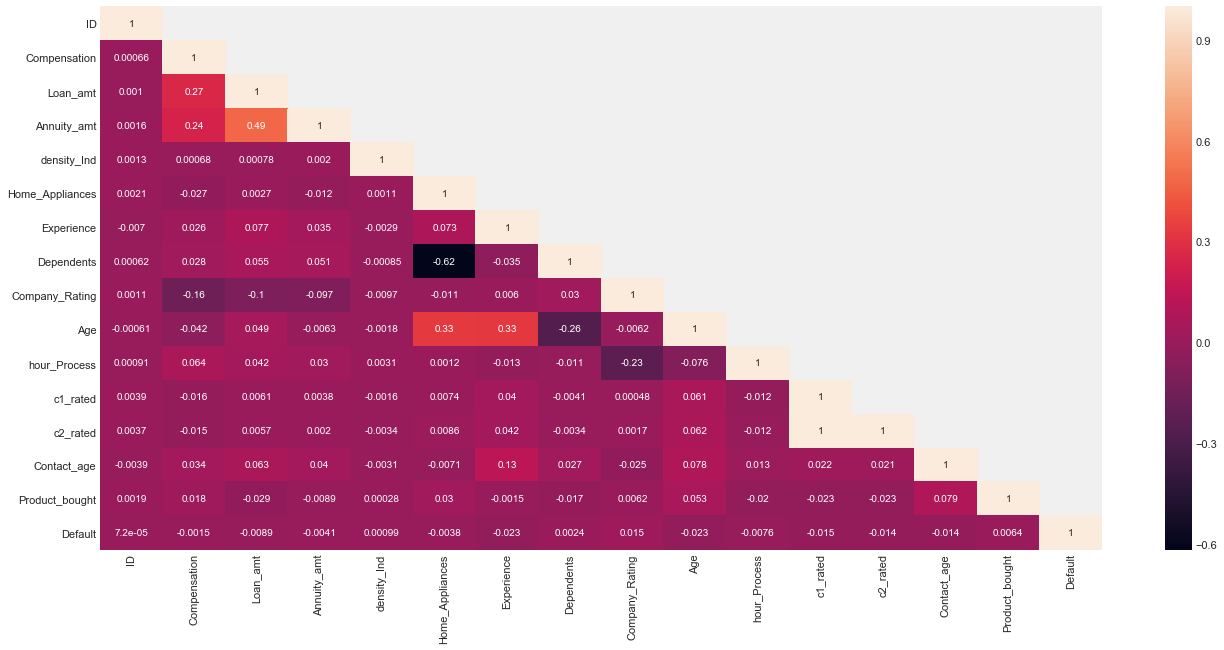

In [22]:
plt.figure(figsize=(20,10))
sns.heatmap(df_train.corr(), annot=True,mask=np.triu(df_train.corr(),+1))

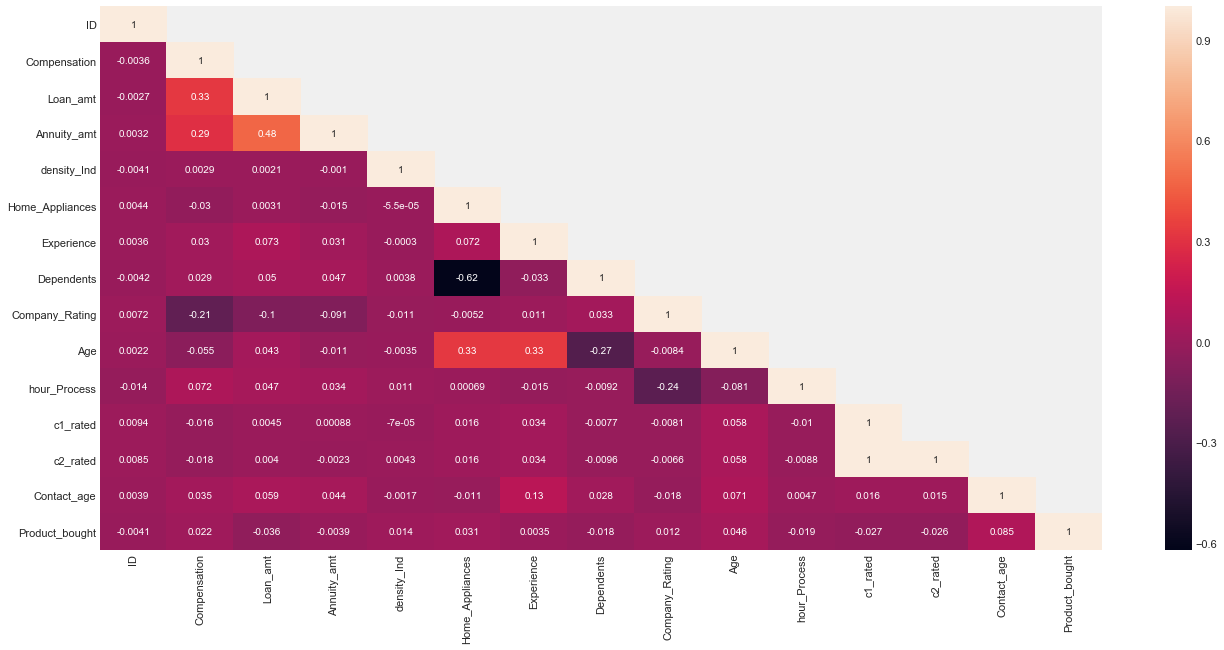

In [28]:
plt.figure(figsize=(20,10))
sns.heatmap(df_test.corr(), annot=True,mask=np.triu(df_test.corr(),+1))

### Treating of Missing values

Imputing the missing values

In [29]:
for column in df_train.columns:
    if df_train[column].dtype != 'object':
        median = df_train[column].median()
        df_train[column] = df_train[column].fillna(median)    
        
df_train.isnull().sum() 

ID                        0
Compensation              0
Vehicle_Status         9104
Loan_amt                  0
Annuity_amt               0
density_Ind               0
Job_Type              10248
Default_hist              0
Prop_List              1965
Home_Appliances           0
Region_Type               0
Credit_Inq             2690
Education_det             0
Marital_Stat              0
Gen                       0
Credit_Lnks               0
Experience                0
Income_Alt             7682
Day_Process               0
Ph_No                     0
Type_Loan                 0
Dependents                0
Company_Rating            0
Region                    0
Age                       0
hour_Process              0
Addr_permanent            0
Permanent_Addr_tag        0
c1_rated                  0
c2_rated                  0
Contact_age               0
Product_bought            0
Default                   0
dtype: int64

In [30]:
for column in df_test.columns:
    if df_test[column].dtype != 'object':
        median = df_test[column].median()
        df_test[column] = df_test[column].fillna(median)    
        
df_test.isnull().sum() 

ID                       0
Compensation             0
Vehicle_Status        3883
Loan_amt                 0
Annuity_amt              0
density_Ind              0
Job_Type              4320
Default_hist             0
Prop_List              911
Home_Appliances          0
Region_Type              0
Credit_Inq            1166
Education_det            0
Marital_Stat             0
Gen                      0
Credit_Lnks              0
Experience               0
Income_Alt            3299
Day_Process              0
Ph_No                    0
Type_Loan                0
Dependents               0
Company_Rating           0
Region                   0
Age                      0
hour_Process             0
Addr_permanent           0
Permanent_Addr_tag       0
c1_rated                 0
c2_rated                 0
Contact_age              0
Product_bought           0
dtype: int64

In [31]:

for column in df_train:
    if df_train[column].dtype == 'object':
        if df_train[column].isnull().any():
#             if(column in cateogry_columns):
                df_train[column]=df_train[column].fillna(df_train[column].mode()[0])
df_train.isnull().sum() 

ID                    0
Compensation          0
Vehicle_Status        0
Loan_amt              0
Annuity_amt           0
density_Ind           0
Job_Type              0
Default_hist          0
Prop_List             0
Home_Appliances       0
Region_Type           0
Credit_Inq            0
Education_det         0
Marital_Stat          0
Gen                   0
Credit_Lnks           0
Experience            0
Income_Alt            0
Day_Process           0
Ph_No                 0
Type_Loan             0
Dependents            0
Company_Rating        0
Region                0
Age                   0
hour_Process          0
Addr_permanent        0
Permanent_Addr_tag    0
c1_rated              0
c2_rated              0
Contact_age           0
Product_bought        0
Default               0
dtype: int64

In [32]:

for column in df_test:
    if df_test[column].dtype == 'object':
        if df_test[column].isnull().any():
#             if(column in cateogry_columns):
                df_test[column]=df_test[column].fillna(df_test[column].mode()[0])
df_test.isnull().sum() 

ID                    0
Compensation          0
Vehicle_Status        0
Loan_amt              0
Annuity_amt           0
density_Ind           0
Job_Type              0
Default_hist          0
Prop_List             0
Home_Appliances       0
Region_Type           0
Credit_Inq            0
Education_det         0
Marital_Stat          0
Gen                   0
Credit_Lnks           0
Experience            0
Income_Alt            0
Day_Process           0
Ph_No                 0
Type_Loan             0
Dependents            0
Company_Rating        0
Region                0
Age                   0
hour_Process          0
Addr_permanent        0
Permanent_Addr_tag    0
c1_rated              0
c2_rated              0
Contact_age           0
Product_bought        0
dtype: int64

In [33]:
df_cat_train = df_train.select_dtypes(include = ['object'])
df_num_train = df_train.select_dtypes(include = ['float64','int64'])

In [34]:
df_cat_test = df_test.select_dtypes(include = ['object'])
df_num_test = df_test.select_dtypes(include = ['float64','int64'])

In [35]:
df_cat_train = pd.get_dummies(df_cat_train, drop_first = True)
df_cat_train.head()

Vehicle_Status_Y  Job_Type_IT  Job_Type_Non-IT  Default_hist_ndf  \
0                 1            1                0                 1   
1                 0            1                0                 1   
2                 0            0                0                 1   
3                 0            0                1                 0   
4                 1            0                1                 1   

   Prop_List_None  Prop_List_One  Region_Type_Rural  Region_Type_other  \
0               0              0                  0                  0   
1               0              0                  0                  0   
2               0              1                  0                  0   
3               1              0                  0                  0   
4               0              0                  1                  0   

   Credit_Inq_2  Credit_Inq_3  Credit_Inq_>4  Education_det_Other  \
0             0             0              0                    0   
1             1             0              0                    0   
2             0             1              0                    1   
3             0             0              0                    0   
4             1             0              0                    0   

   Education_det_P_Grad  Marital_Stat_Married  Marital_Stat_Single  \
0                     0                     1                    0   
1                     0                     1                    0   
2                     0                     1                    0   
3                     0                     1                    0   
4                     0                     1                    0   

   Marital_Stat_Widow  Gen_M  Credit_Lnks_4_to_6  Credit_Lnks_>6  \
0                   0      0                   0               0   
1                   0      1                   0               0   
2                   0      1                   0               0   
3                   0      1                   0               0   
4                   0      0                   1               0   

   Income_Alt_Y  Day_Process_SAT  Day_Process_Sun  Day_Process_Tue  \
0             0                1                0                0   
1             0                0                0                0   
2             0                0                0                0   
3             0                0                0                0   
4             1                0                1                0   

   Day_Process_mon  Day_Process_thur  Day_Process_wed  Ph_No_Yes  \
0                0                 0                0          1   
1                0                 0                1          1   
2                1                 0                0          1   
3                0                 0                1          1   
4                0                 0                0          1   

   Type_Loan_RLoan  Region_East  Region_North  Region_South  \
0                0            1             0             0   
1                0            0             1             0   
2                0            0             1             0   
3                1            0             0             1   
4                0            0             1             0   

   Addr_permanent_Yes  Permanent_Addr_tag_Yes  
0                   1                       0  
1                   1                       1  
2                   1                       1  
3                   1                       1  
4                   1                       1

In [36]:
df_cat_test = pd.get_dummies(df_cat_test, drop_first = True)
df_cat_test.head()

Vehicle_Status_Y  Job_Type_IT  Job_Type_Non-IT  Default_hist_ndf  \
0                 1            0                0                 1   
1                 0            0                0                 1   
2                 0            1                0                 1   
3                 0            1                0                 1   
4                 0            0                1                 1   

   Prop_List_None  Prop_List_One  Region_Type_Rural  Region_Type_other  \
0               0              0                  0                  0   
1               0              1                  0                  0   
2               0              0                  1                  0   
3               0              1                  0                  0   
4               0              1                  0                  0   

   Credit_Inq_2  Credit_Inq_3  Credit_Inq_>4  Education_det_Other  \
0             0             0              0                    0   
1             0             0              0                    0   
2             0             0              0                    0   
3             0             0              0                    0   
4             0             1              0                    0   

   Education_det_P_Grad  Marital_Stat_Married  Marital_Stat_Single  \
0                     0                     1                    0   
1                     0                     1                    0   
2                     0                     1                    0   
3                     0                     1                    0   
4                     1                     1                    0   

   Marital_Stat_Widow  Gen_M  Credit_Lnks_4_to_6  Credit_Lnks_>6  \
0                   0      1                   0               0   
1                   0      1                   0               0   
2                   0      1                   0               0   
3                   0      1                   0               0   
4                   0      0                   0               0   

   Income_Alt_Y  Day_Process_SAT  Day_Process_Sun  Day_Process_Tue  \
0             0                0                0                0   
1             1                0                0                0   
2             1                0                0                0   
3             1                0                0                1   
4             1                0                0                0   

   Day_Process_mon  Day_Process_thur  Day_Process_wed  Ph_No_Yes  \
0                0                 1                0          1   
1                0                 0                1          0   
2                0                 1                0          0   
3                0                 0                0          1   
4                0                 0                1          1   

   Type_Loan_RLoan  Region_East  Region_North  Region_South  \
0                0            0             1             0   
1                0            0             0             0   
2                0            0             0             1   
3                0            1             0             0   
4                1            0             1             0   

   Addr_permanent_Yes  Permanent_Addr_tag_Yes  
0                   1                       1  
1                   1                       1  
2                   1                       1  
3                   1                       1  
4                   1                       1

In [37]:
df_train = pd.concat([df_cat_train,df_num_train],axis=1)
df_train.head()

Vehicle_Status_Y  Job_Type_IT  Job_Type_Non-IT  Default_hist_ndf  \
0                 1            1                0                 1   
1                 0            1                0                 1   
2                 0            0                0                 1   
3                 0            0                1                 0   
4                 1            0                1                 1   

   Prop_List_None  Prop_List_One  Region_Type_Rural  Region_Type_other  \
0               0              0                  0                  0   
1               0              0                  0                  0   
2               0              1                  0                  0   
3               1              0                  0                  0   
4               0              0                  1                  0   

   Credit_Inq_2  Credit_Inq_3  Credit_Inq_>4  Education_det_Other  \
0             0             0              0                    0   
1             1             0              0                    0   
2             0             1              0                    1   
3             0             0              0                    0   
4             1             0              0                    0   

   Education_det_P_Grad  Marital_Stat_Married  Marital_Stat_Single  \
0                     0                     1                    0   
1                     0                     1                    0   
2                     0                     1                    0   
3                     0                     1                    0   
4                     0                     1                    0   

   Marital_Stat_Widow  Gen_M  Credit_Lnks_4_to_6  Credit_Lnks_>6  \
0                   0      0                   0               0   
1                   0      1                   0               0   
2                   0      1                   0               0   
3                   0      1                   0               0   
4                   0      0                   1               0   

   Income_Alt_Y  Day_Process_SAT  Day_Process_Sun  Day_Process_Tue  \
0             0                1                0                0   
1             0                0                0                0   
2             0                0                0                0   
3             0                0                0                0   
4             1                0                1                0   

   Day_Process_mon  Day_Process_thur  Day_Process_wed  Ph_No_Yes  \
0                0                 0                0          1   
1                0                 0                1          1   
2                1                 0                0          1   
3                0                 0                1          1   
4                0                 0                0          1   

   Type_Loan_RLoan  Region_East  Region_North  Region_South  \
0                0            1             0             0   
1                0            0             1             0   
2                0            0             1             0   
3                1            0             0             1   
4                0            0             1             0   

   Addr_permanent_Yes  Permanent_Addr_tag_Yes      ID  Compensation  Loan_amt  \
0                   1                       0  540071      801850.0  658040.0   
1                   1                       1  511643      884222.0  198075.0   
2                   1                       1  506688      284120.0  101056.0   
3                   1                       1  499360      341874.0  179008.0   
4                   1                       1  438350     1259895.0  573715.0   

   Annuity_amt  density_Ind  Home_Appliances  Experience  Dependents  \
0     13816.52       0.0304              4.0         0.9         3.0   
1     11173.06       0.0194              1.0  

In [38]:
df_test = pd.concat([df_cat_test,df_num_test],axis=1)
df_test.head()

Vehicle_Status_Y  Job_Type_IT  Job_Type_Non-IT  Default_hist_ndf  \
0                 1            0                0                 1   
1                 0            0                0                 1   
2                 0            1                0                 1   
3                 0            1                0                 1   
4                 0            0                1                 1   

   Prop_List_None  Prop_List_One  Region_Type_Rural  Region_Type_other  \
0               0              0                  0                  0   
1               0              1                  0                  0   
2               0              0                  1                  0   
3               0              1                  0                  0   
4               0              1                  0                  0   

   Credit_Inq_2  Credit_Inq_3  Credit_Inq_>4  Education_det_Other  \
0             0             0              0                    0   
1             0             0              0                    0   
2             0             0              0                    0   
3             0             0              0                    0   
4             0             1              0                    0   

   Education_det_P_Grad  Marital_Stat_Married  Marital_Stat_Single  \
0                     0                     1                    0   
1                     0                     1                    0   
2                     0                     1                    0   
3                     0                     1                    0   
4                     1                     1                    0   

   Marital_Stat_Widow  Gen_M  Credit_Lnks_4_to_6  Credit_Lnks_>6  \
0                   0      1                   0               0   
1                   0      1                   0               0   
2                   0      1                   0               0   
3                   0      1                   0               0   
4                   0      0                   0               0   

   Income_Alt_Y  Day_Process_SAT  Day_Process_Sun  Day_Process_Tue  \
0             0                0                0                0   
1             1                0                0                0   
2             1                0                0                0   
3             1                0                0                1   
4             1                0                0                0   

   Day_Process_mon  Day_Process_thur  Day_Process_wed  Ph_No_Yes  \
0                0                 1                0          1   
1                0                 0                1          0   
2                0                 1                0          0   
3                0                 0                0          1   
4                0                 0                1          1   

   Type_Loan_RLoan  Region_East  Region_North  Region_South  \
0                0            0             1             0   
1                0            0             0             0   
2                0            0             0             1   
3                0            1             0             0   
4                1            0             1             0   

   Addr_permanent_Yes  Permanent_Addr_tag_Yes      ID  Compensation  \
0                   1                       1  487410      653106.0   
1                   1                       1  533258      434150.0   
2                   1                       1  581926      489060.0   
3                   1                       1  486301      957294.0   
4                   1                       1  580822     1333739.0   

    Loan_amt  Annuity_amt  density_Ind  Home_Appliances  Experience  \
0  809400.00      9145.51       0.0015              1.0         5.4   
1   72618.75      7683.23       0.0332              4.0         2.3   
2  267255.80      9032.85       0.031

In [39]:
df_train_copy = df_train.drop(columns=['ID'], axis=1)
df_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132440 entries, 0 to 132439
Data columns (total 48 columns):
Vehicle_Status_Y          132440 non-null uint8
Job_Type_IT               132440 non-null uint8
Job_Type_Non-IT           132440 non-null uint8
Default_hist_ndf          132440 non-null uint8
Prop_List_None            132440 non-null uint8
Prop_List_One             132440 non-null uint8
Region_Type_Rural         132440 non-null uint8
Region_Type_other         132440 non-null uint8
Credit_Inq_2              132440 non-null uint8
Credit_Inq_3              132440 non-null uint8
Credit_Inq_>4             132440 non-null uint8
Education_det_Other       132440 non-null uint8
Education_det_P_Grad      132440 non-null uint8
Marital_Stat_Married      132440 non-null uint8
Marital_Stat_Single       132440 non-null uint8
Marital_Stat_Widow        132440 non-null uint8
Gen_M                     132440 non-null uint8
Credit_Lnks_4_to_6        132440 non-null uint8
Credit_Lnks_>6           

In [40]:
test_file_ids = df_test['ID'] ## necessary step
df_test_copy = df_test.drop(columns=['ID'], axis=1)
df_test_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56760 entries, 0 to 56759
Data columns (total 47 columns):
Vehicle_Status_Y          56760 non-null uint8
Job_Type_IT               56760 non-null uint8
Job_Type_Non-IT           56760 non-null uint8
Default_hist_ndf          56760 non-null uint8
Prop_List_None            56760 non-null uint8
Prop_List_One             56760 non-null uint8
Region_Type_Rural         56760 non-null uint8
Region_Type_other         56760 non-null uint8
Credit_Inq_2              56760 non-null uint8
Credit_Inq_3              56760 non-null uint8
Credit_Inq_>4             56760 non-null uint8
Education_det_Other       56760 non-null uint8
Education_det_P_Grad      56760 non-null uint8
Marital_Stat_Married      56760 non-null uint8
Marital_Stat_Single       56760 non-null uint8
Marital_Stat_Widow        56760 non-null uint8
Gen_M                     56760 non-null uint8
Credit_Lnks_4_to_6        56760 non-null uint8
Credit_Lnks_>6            56760 non-null uint

In [41]:
x = df_train_copy.drop('Default', axis=1)

y = df_train_copy['Default']

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2 , random_state=42,stratify=y)
x_train.shape

(105952, 47)

In [43]:
y_train.shape

(105952,)

In [45]:
x_test.shape

(26488, 47)

In [46]:
y_test.shape

(26488,)

### Logistic Regression

In [47]:
grid={'penalty':['l1','l2','none'],
      'solver':['lbfgs', 'liblinear'],
      'tol':[0.0001,0.000001]}

In [48]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=100000,n_jobs=2)

In [49]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')
grid_search.fit(x_train, y_train)

KeyboardInterrupt: 